In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 783 		 0.1 		 0.1 |
| 2837 		 0.1 		 0.1 |
| 3263 		 0.1 		 0.1 |
| 1708 		 0.1 		 0.1 |
| 3396 		 0.1 		 0.1 |
| 3575 		 0.1 		 0.1 |
| 2244 		 0.1 		 0.1 |
| 889 		 0.1 		 0.1 |
| 1841 		 0.1 		 0.1 |
| 102 		 0.1 		 0.1 |
| 3717 		 0.1 		 0.1 |
| 1398 		 0.1 		 0.1 |
| 5188 		 0.1 		 0.1 |
| 102 		 0.1 		 0.1 |
| 483 		 0.1 		 0.1 |
| 2028 		 0.1 		 0.1 |
| 542 		 0.1 		 0.1 |
| 7453 		 0.1 		 0.1 |
| 1604 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1447.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 2243
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


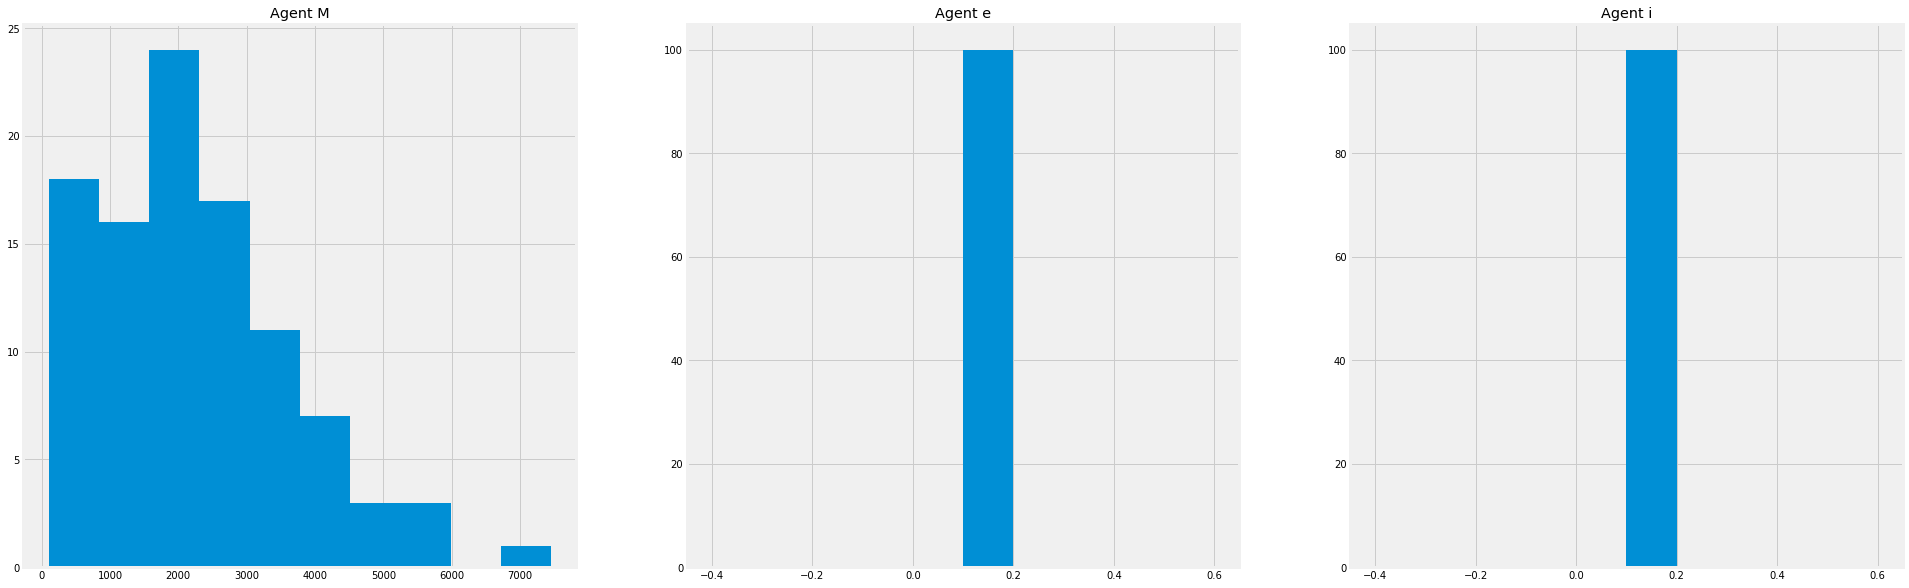

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 255.0, Temptation: 284.0, Sucker: -28.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 70.0, Temptation: 78.0, Sucker: -8.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 294.0, Temptation: 326.0, Sucker: -33.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 70.0, Temptation: 78.0, Sucker: -8.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 154.0, Temptation: 171.0, Sucker: -17.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 70.0, Temptation: 78.0, Suck

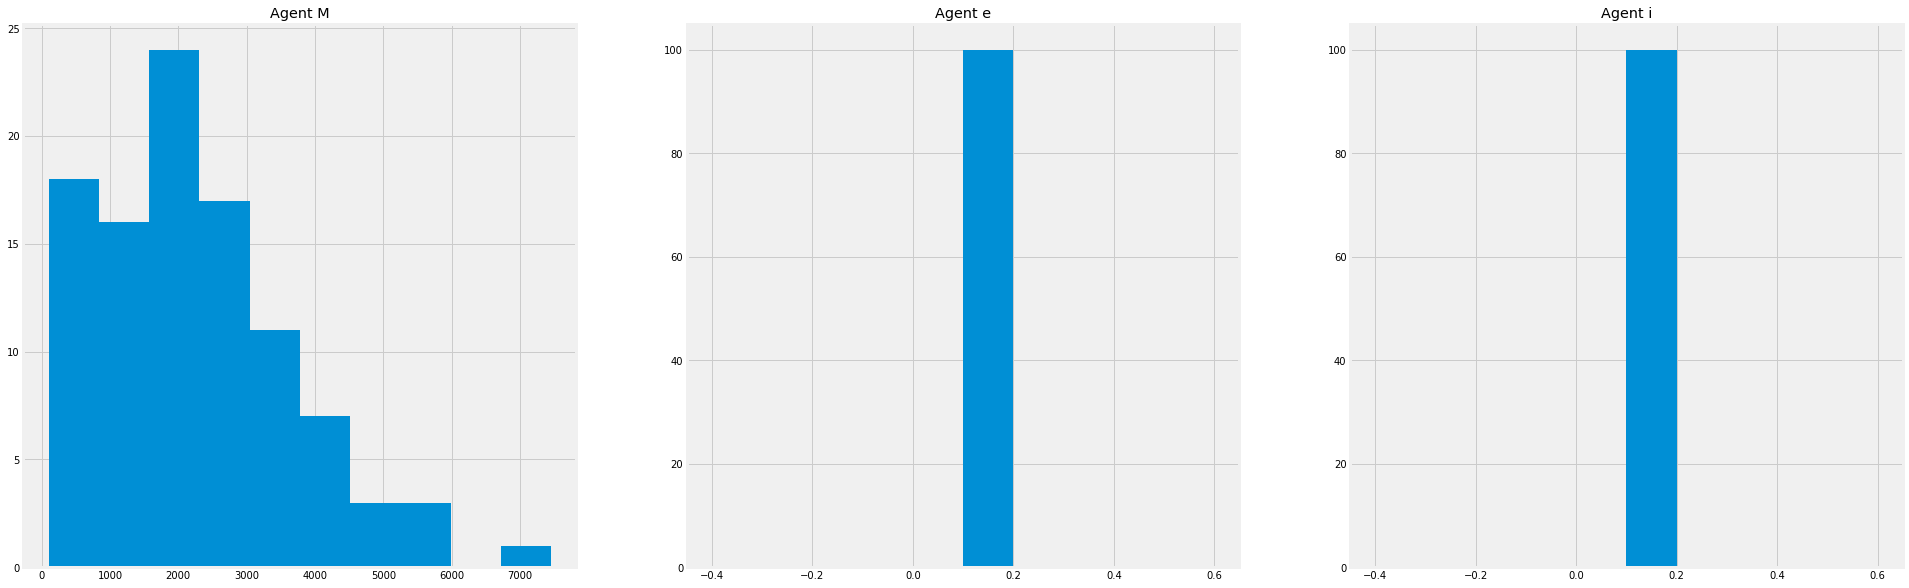

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 25 minutes.
    S.D.  Counts  Seed
0    0.5     267  1024
1    0.6     254  1024
2    0.7     221  1024
3    0.8     239  1024
4    0.9     236  1024
5    1.0     214  1024
6    1.1     188  1024
7    1.2     183  1024
8    1.3     155  1024
9    1.4     130  1024
10   1.5     125  1024
11   1.6      92  1024
12   1.7      69  1024
13   1.8      53  1024
14   1.9      35  1024
15   2.0      32  1024
16   2.1      24  1024
17   2.2      16  1024
18   2.3      15  1024
19   2.4      11  1024
20   2.5       9  1024
21   2.6       9  1024
22   2.7       7  1024
23   2.8       7  1024
24   2.9       4  1024
25   3.0       3  1024


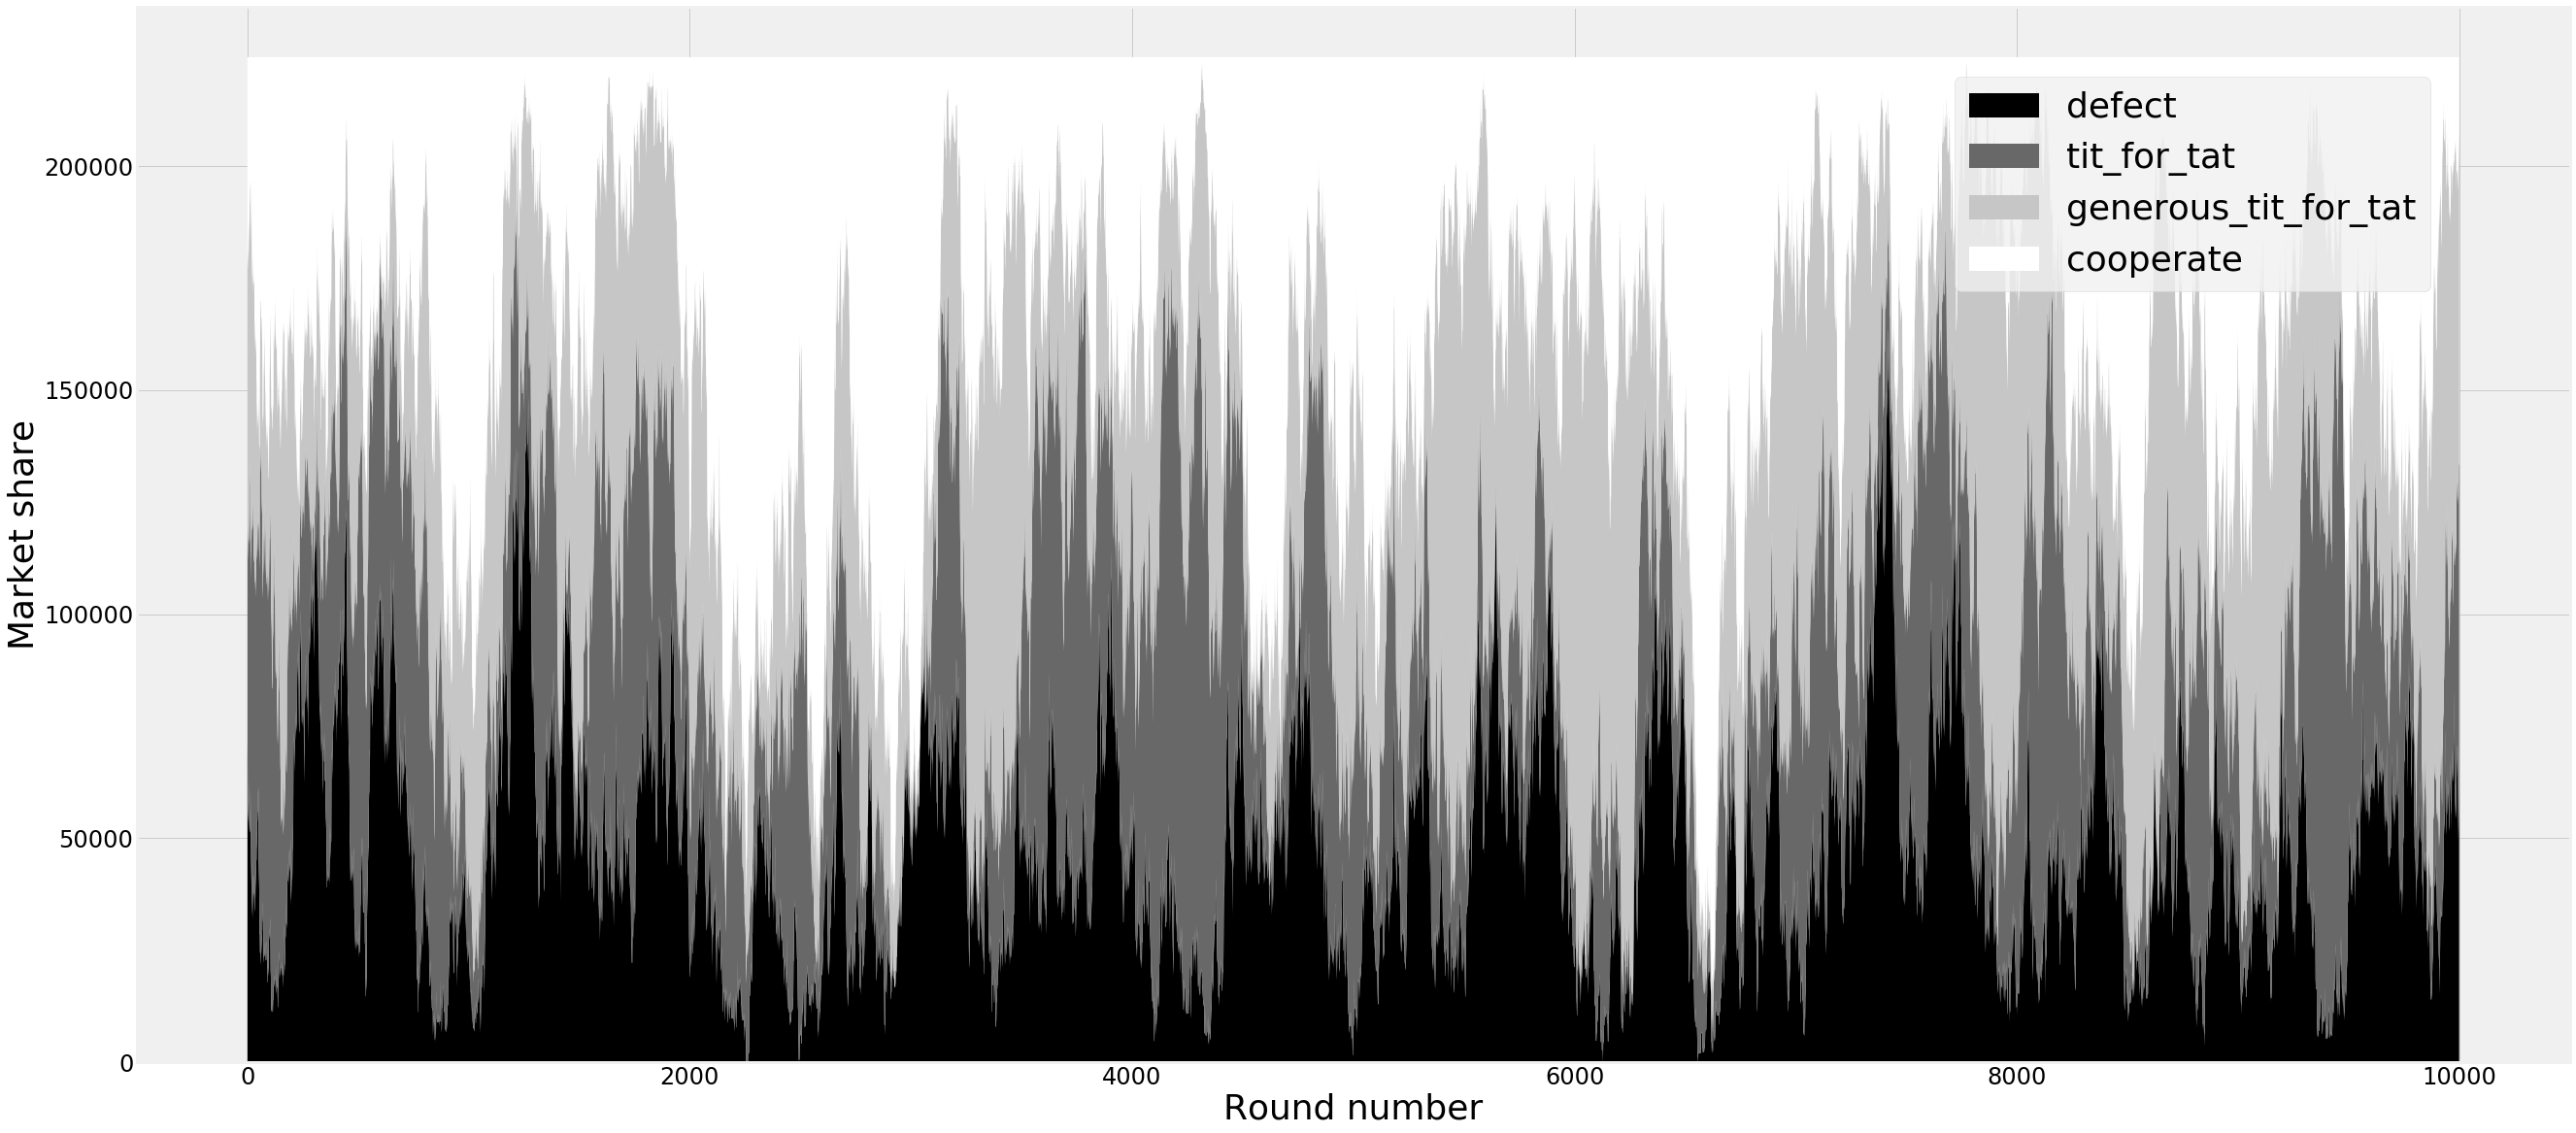

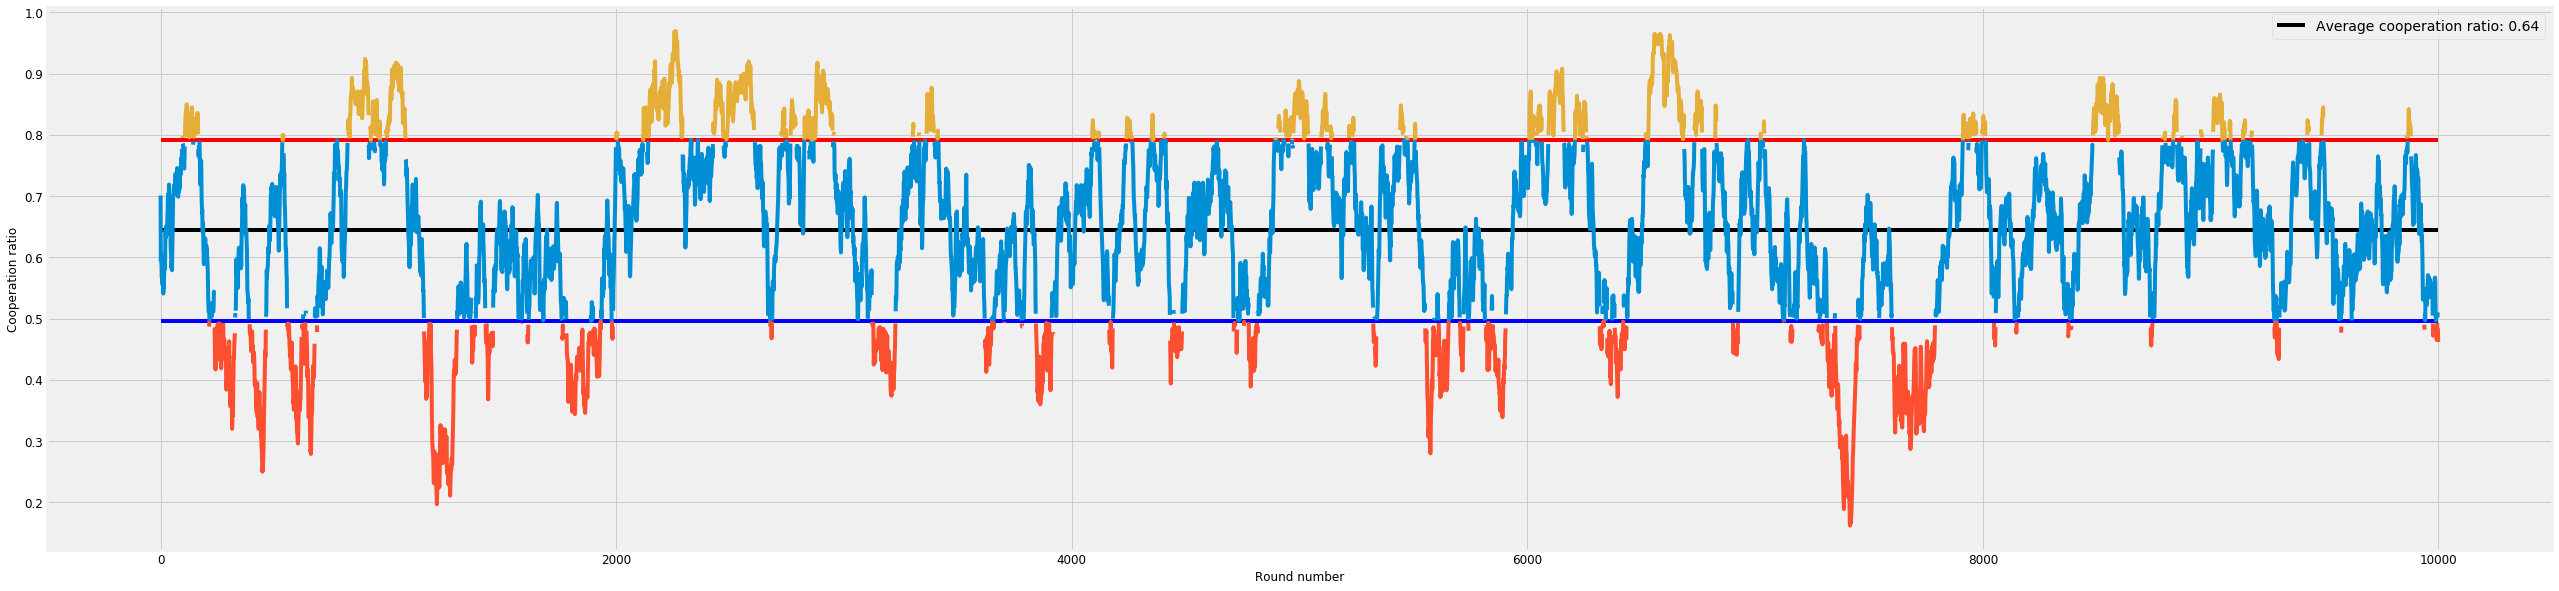

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))